# Titaniko tragedijos analizė

## Hipotezė - keleiviams mokėjusiems brangiau už bilietus išgyventi tikimybė buvo didesnė. Ar tai tiesa? Žemiau pateiktoje duomenų analizėje matysime keleivių žuties / išgyvenimo priklausomybė nuo kitų faktorių 

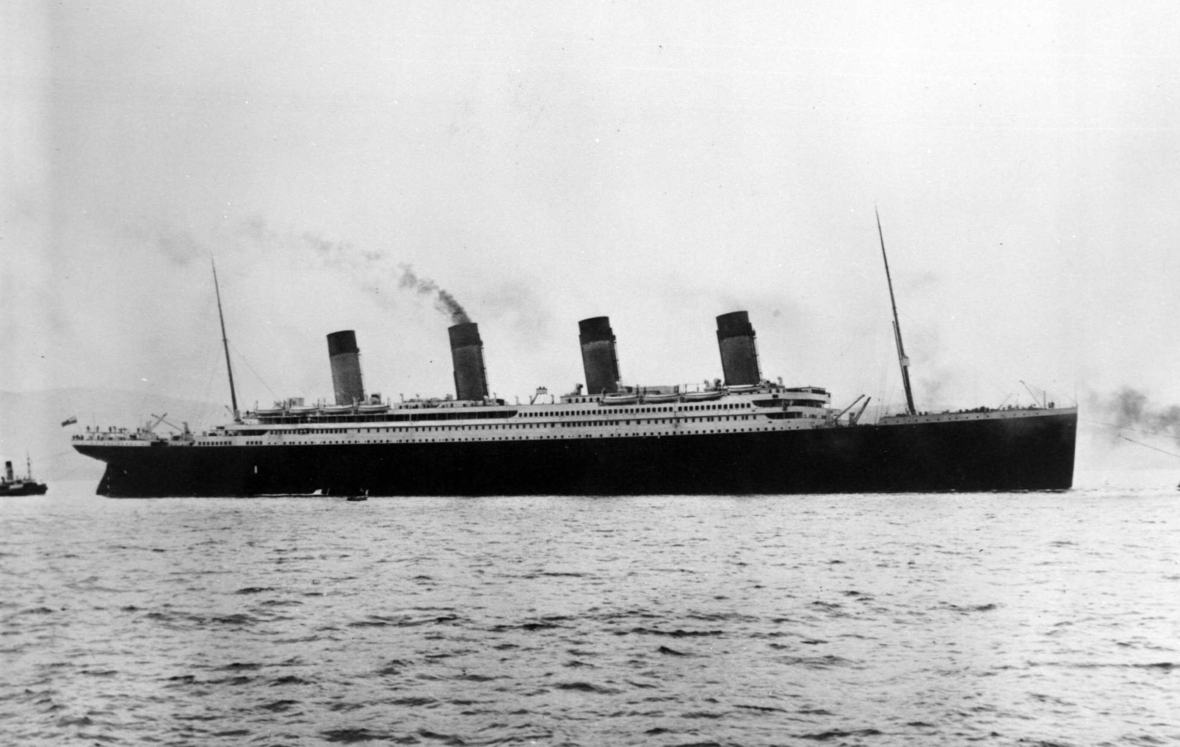

Mano atlikto darbo tema - paprasta ir elementari, Titaniko tragedijos analizė. 
Keletas faktų prisiminui:
    1. Titanikas buvo transatlantinis keleivinis laivas. Šis laivas buvo pastatytas Belfaste, Airijoje ir             priklausė „White Star Line“ kompanijai. Tai buvo didžiausias pasaulyje laivas tuo laikotarpiu.
    2. Laivas „Titanikas“ nuskendo susidūręs su ledkalniu 1912 m. balandžio 14 d. Katastrofos metu žuvo apie          1500 žmonių.

In [503]:
import pandas as pd                      # Duomenų struktūrų operacijoms
import numpy as np                       # Skaičiavimų atlikimui: arrays, matricos
import seaborn as sns                    # Time series, violin plots ir etc
import matplotlib.pyplot as plt          # Grafikams ir kitoms vizualizacijoms
%matplotlib inline
import matplotlib.style as style
import plotly.express as px

## Darbas su duomenimis

Nuskaitome duomenų paketa

In [504]:
titanic = pd.read_csv('/Users/lauramikalajunaite/Downloads/titanic.csv')

Analizuojame lentelės duomenis

In [505]:
print('Bendras eilučių skaičius lentelėje yra',len(titanic.index))
print('Bendras stulpelių skaičius lentelėje yra', len(titanic.columns))

Bendras eilučių skaičius lentelėje yra 891
Bendras stulpelių skaičius lentelėje yra 12


In [506]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lentelėje pateikti tik 891 arba apie 40% duomenų apie keliavusius laineriu, laineriu keliavo 2,224 asmenys
Išgyvenusieji žymimi 1, žuvusieji 0

In [507]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ieškome lentelėje trūkstamų reikšmių ir jas skaičiuojame. Atsakymą pateikdami mažėjančia tvarka nuo stulpelio, kuris turi daugiausiai trūkstamų reikšmių

In [508]:
missing = titanic.isnull().sum().sort_values(ascending=False)
missing.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

Pateikiama taip pat trūkstamų reikšmių procentinė išraiška

In [509]:
missing_pr = titanic.isnull().sum()/titanic.isnull().count()*100
missing_vl = pd.DataFrame({'Missing values': missing, 'Percentage':missing_pr.sort_values(ascending=False)})
missing_vl.head()

,Missing values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


Stebima, kad lentelėje ne visi duomenys yra užpildyti, siekiant tikslesnio darbo su duomenimis ir duomenų atvaizdavimo pirmiausia pakeisime lentelės stulpelio "Age" trūkstamas reikšmes į atitinkančias viso stuleplio vidurkį ir atliekame kitas lentelės korekcijas.

In [510]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

Pakeičiame eilučių reikšmes į Lietuvių kalbą. Iš male į vyrus ir female į moteris

In [511]:
titanic['Sex'] = titanic['Sex'].map({'female': 'Moterys', 'male': 'Vyrai'})

Pridėkime šiemos dydžio aprašymą

In [512]:
titanic['Seimos_nariai']=titanic.Parch + titanic.SibSp
titanic['Vienisas']=titanic['Seimos_nariai']==0

In [513]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Seimos_nariai,Vienisas
0,1,0,3,"Braund, Mr. Owen Harris",Vyrai,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Moterys,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",Moterys,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Moterys,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",Vyrai,35.0,0,0,373450,8.0500,NaN,S,0,True


Taip pat pakoreaguokime įlipimo miestų pavadinimus į labiau suprantamus

In [514]:
titanic['Embarked'] = titanic['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

Šalinamas ir stulpelis įvardinantis kabinas, nes pagal atliktus skaičiavimus ir analizę stebima, kad šiame stulpelyje truksta net 77 proc duomenų. Taip pat šalinami ir vardo bei bilieto nr stulpeliai, nes jie neturės reikšmes mūsų tolimesnėje analizėje. 

In [515]:
titanic.drop(['Cabin','Ticket'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Seimos_nariai,Vienisas
0,1,0,3,"Braund, Mr. Owen Harris",Vyrai,22.0,1,0,7.2500,Southampton,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Moterys,38.0,1,0,71.2833,Cherbourg,1,False
2,3,1,3,"Heikkinen, Miss. Laina",Moterys,26.0,0,0,7.9250,Southampton,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Moterys,35.0,1,0,53.1000,Southampton,1,False
4,5,0,3,"Allen, Mr. William Henry",Vyrai,35.0,0,0,8.0500,Southampton,0,True


## Keleivių įlaipimo miestų vizualizacija

Žemiau pateikta diagrama atvaizduoja kuriuose miestuose įlipo daugiausiai keleivių

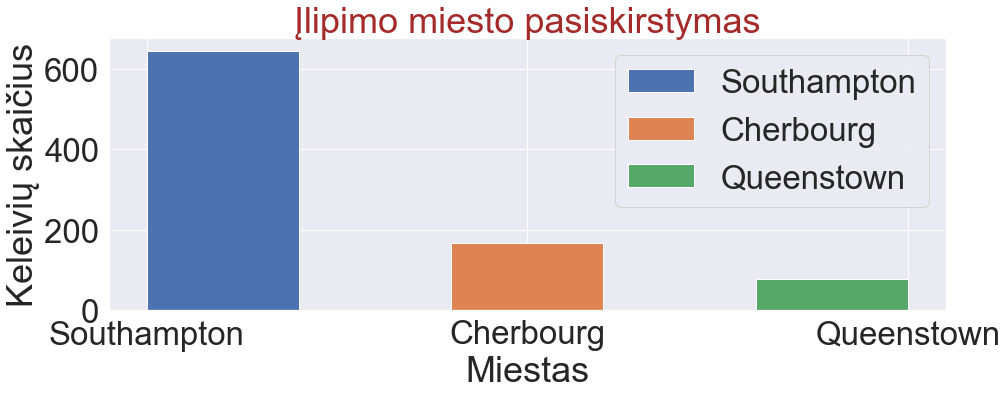

In [516]:
cities = plt.figure(figsize=(15,5))
plt.hist([titanic[titanic['Embarked']=='Southampton']['Embarked'], titanic[titanic['Embarked']=='Cherbourg']['Embarked'],titanic[titanic['Embarked']=='Queenstown']['Embarked']], stacked=True,
         bins = 5,label = ['Southampton','Cherbourg','Queenstown'])
plt.xlabel('Miestas')
plt.ylabel('Keleivių skaičius')
plt.legend()
plt.title('Įlipimo miesto pasiskirstymas',color='Brown',loc='center');

## Išgyvenusių / žuvusių pasiskirstymo vizualizacijos

Žemiau pateikiama lentelė, kuri atvaizduoja kiek keleivių išgyveno ir kiek žuvo tragedijos metu

In [517]:
pd.DataFrame({' ' : ['Neišgyveno','Išgyveno'], 'Keleivių skaičius':titanic['Survived'].value_counts(),
            'Procentai':[(titanic['Survived']==0).sum()*100/len(titanic), (titanic['Survived']==1).
                         sum()*100/len(titanic)]}).set_index(' ').head()

,Keleivių skaičius,Procentai
,,
Neišgyveno,549,61.616162
Išgyveno,342,38.383838


Žemiau pateikta diagrama/pyragas atvaizduoja išgyvenusių vyrų ir moterų pasiskirstymą. Stebima, kad moterų 
yra gerokai daugiau, galime daryti prielaidą, kad tai pasekmė to, jog dažniausiai evakuacijų metu 
visų pirmą yra užleidžiama vieta moterims ir vaikams, o tik vėliau vyrams. 

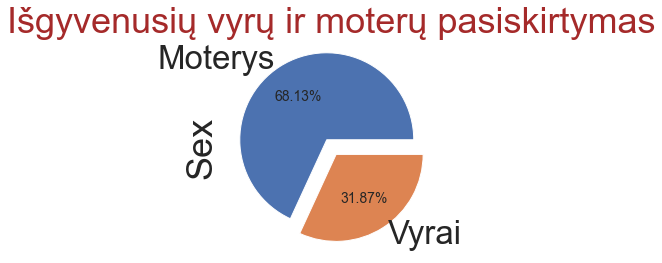

In [518]:
matplotlib.rcParams.update({'font.size': 14})
titanic[titanic['Survived']==1]['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%')
plt.title('Išgyvenusių vyrų ir moterų pasiskirtymas',color='Brown',loc='center');

Žemiau pateikiama diagrama, kurioje stebimas žuvusiųju pasiskirstymas pagal lytis.

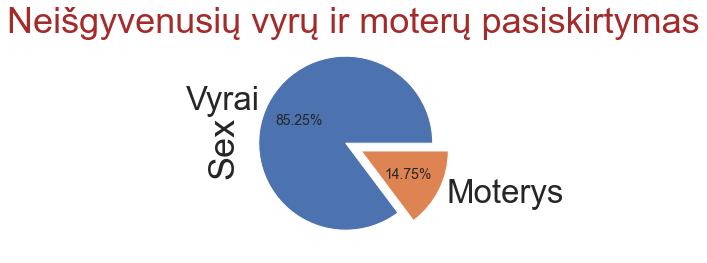

In [519]:
matplotlib.rcParams.update({'font.size': 14})
titanic[titanic['Survived']==0]['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%')
plt.title('Neišgyvenusių vyrų ir moterų pasiskirtymas',color='Brown',loc='center');

Žemiau pateikiama diagrama, kuri atvaizduoja išgyvenusių ir žuvusių pasiskirstymą pagal amžių. 
Galima teigti, kad daugiausia žuvo asmenys, kurių amžius buvo apie 30 metų. 

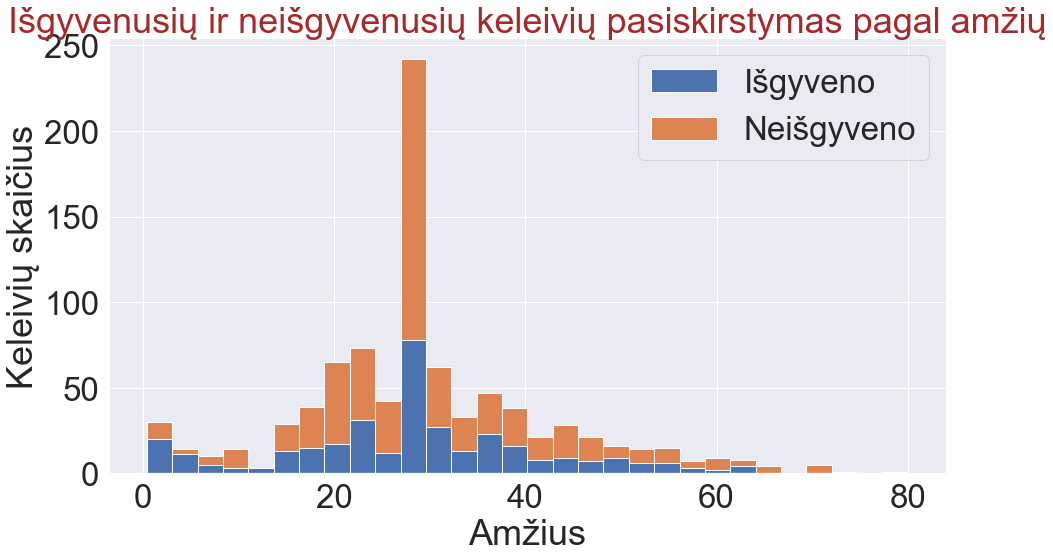

In [520]:
figure = plt.figure(figsize=(15,8))
plt.hist([titanic[titanic['Survived']==1]['Age'], titanic[titanic['Survived']==0]['Age']], stacked=True,
         bins = 30,label = ['Išgyveno','Neišgyveno'])
plt.xlabel('Amžius')
plt.ylabel('Keleivių skaičius')
plt.legend()
plt.title('Išgyvenusių ir neišgyvenusių keleivių pasiskirstymas pagal amžių',color='Brown',loc='center');

## HIPOTEZĖS PATVIRTINIMAS
Žemiau pateikta diagrama patvirtina išsikeltą hipotezę, daugiausia žuvusiųju mokėjo už bilietus žemiausia kaina. 

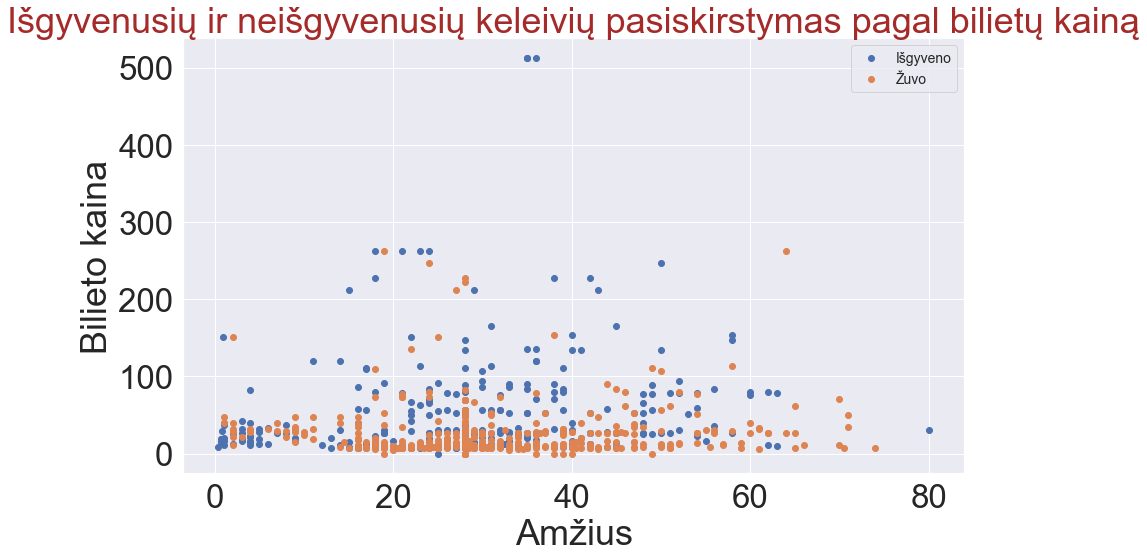

In [521]:
plt.figure(figsize=(14,8))
ax = plt.subplot()
ax.scatter(titanic[titanic['Survived']==1]['Age'],titanic[titanic['Survived']==1]['Fare'])
ax.scatter(titanic[titanic['Survived']==0]['Age'],titanic[titanic['Survived']==0]['Fare'])
ax.set_xlabel('Amžius')
ax.set_ylabel('Bilieto kaina')
ax.legend(('Išgyveno','Žuvo'),scatterpoints=1,loc='upper right',fontsize=14,)
plt.title('Išgyvenusių ir neišgyvenusių keleivių pasiskirstymas pagal bilietų kainą',color='Brown',loc='center');

## Šeimos narių skaičiaus įtaka išgyvenimui

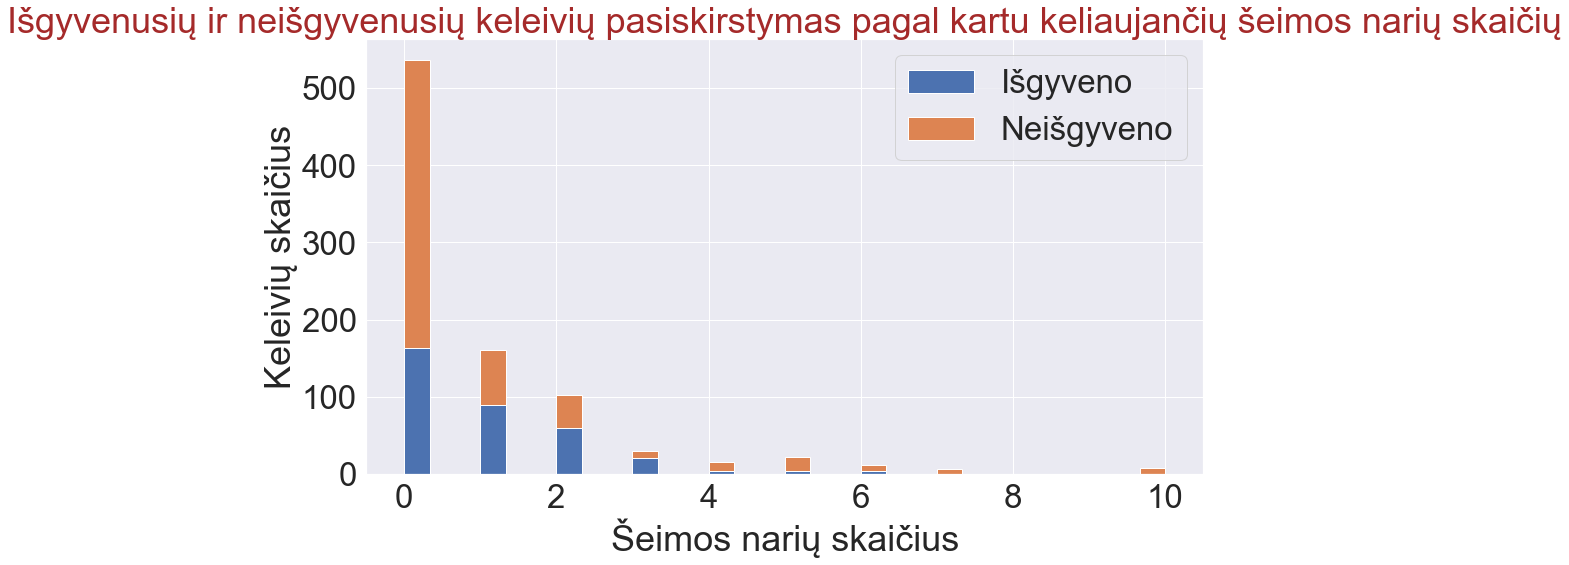

In [522]:
figure1 = plt.figure(figsize=(15,8))
plt.hist([titanic[titanic['Survived']==1]['Seimos_nariai'], titanic[titanic['Survived']==0]['Seimos_nariai']], stacked=True,
         bins = 30,label = ['Išgyveno','Neišgyveno'])
plt.xlabel('Šeimos narių skaičius')
plt.ylabel('Keleivių skaičius')
plt.legend()
plt.title('Išgyvenusių ir neišgyvenusių keleivių pasiskirstymas pagal kartu keliaujančių šeimos narių skaičių',color='Brown',loc='center');

Diagramoje stebima, kad didžiausia šeima buvo sudaryta iš aštuonių asmenų, deja visa šeima neišgyveno, tad remiantis pateikta diagrama galima teigti, kad asmenys, kurie plaukė vieni turėjo didesnę galimybė išgyventi nei tie, kurie plaukė su šeimos nariais. 

## Klasių analizė

Detaliau paanalizuokime klases

Pakeiskime klasių reikšmes

In [523]:
titanic['Pclass'] = titanic['Pclass'].map({1: 'Pirma klasė', 2: 'Antra klasė', 3: 'Trečia klasė'})
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Seimos_nariai,Vienisas
0,1,0,Trečia klasė,"Braund, Mr. Owen Harris",Vyrai,22.0,1,0,7.2500,Southampton,1,False
1,2,1,Pirma klasė,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Moterys,38.0,1,0,71.2833,Cherbourg,1,False
2,3,1,Trečia klasė,"Heikkinen, Miss. Laina",Moterys,26.0,0,0,7.9250,Southampton,0,True
3,4,1,Pirma klasė,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Moterys,35.0,1,0,53.1000,Southampton,1,False
4,5,0,Trečia klasė,"Allen, Mr. William Henry",Vyrai,35.0,0,0,8.0500,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Antra klasė,"Montvila, Rev. Juozas",Vyrai,27.0,0,0,13.0000,Southampton,0,True
887,888,1,Pirma klasė,"Graham, Miss. Margaret Edith",Moterys,19.0,0,0,30.0000,Southampton,0,True
888,889,0,Trečia klasė,"Johnston, Miss. Catherine Helen ""Carrie""",Moterys,28.0,1,2,23.4500,Southampton,3,False
889,890,1,Pirma klasė,"Behr, Mr. Karl Howell",Vyrai,26.0,0,0,30.0000,Cherbourg,0,True


<AxesSubplot:xlabel='Pclass', ylabel='Vidutinė bilieto kaina'>

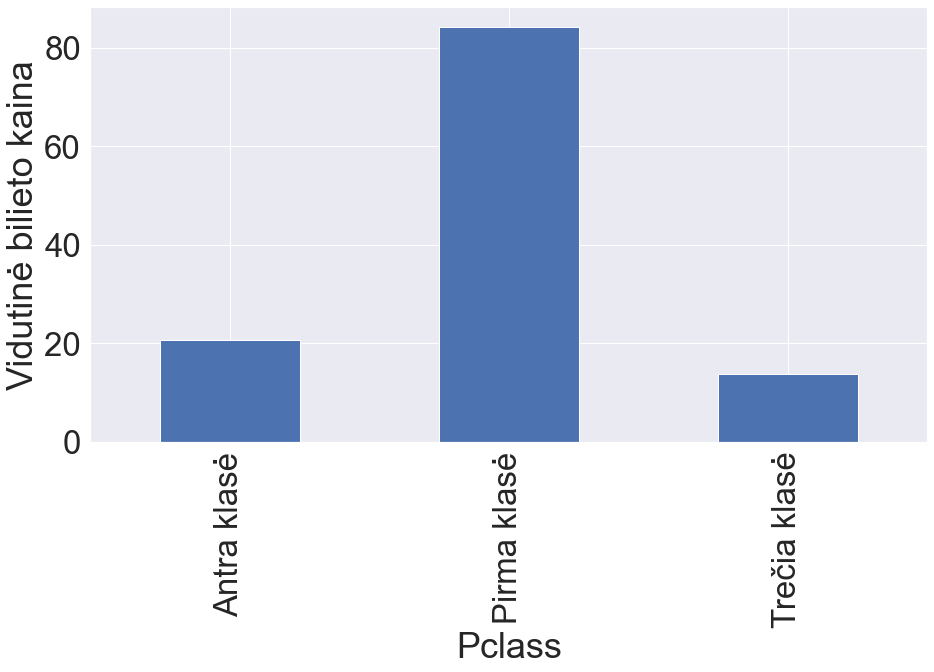

In [524]:
ax = plt.subplot()
ax.set_ylabel('Vidutinė bilieto kaina')
titanic.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

In [525]:
figures = titanic[['Sex', 'Survived', 'Pclass', 'Fare']].groupby(['Sex', 'Survived', 'Pclass']).agg('sum').reset_index()
figures  = px.bar(facet_data, x='Sex', y='Fare', facet_row='Survived', facet_col='Pclass', barmode='group')
figures.update_layout(title_text='Išgybenusių/neišgyvenusių pasiskirstymas pagal bilietų kainų sumą ir kajutės klasę')
figures.show()

## Duomenų korealiacija

Korealiacijoje stebima, kad labiausiai korealiuojantys duomenys yra būtent tie, kuriuos sukūrėme patys - Šeimos_nariai stulpelyje, kurie korealiuojasi su Parch ir SibSp stulpeliais. 
Taip pat šie Parch ir SibSp stulpeliai korealiuojasi tarpusavyje. 
Taip pat stebima teigiama korealiacija tarp Išgyvenusių/Žuvusių stulpelio ir Kainos stulpelio. 
Kainai įtakos taip pat turėjo ir kartu keliaujančių šeimos narių skaičius.  

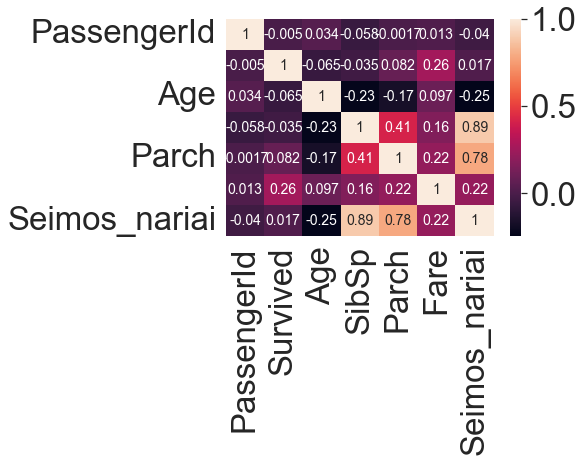

In [526]:
X_num = titanic.select_dtypes(include=np.number)
sns.heatmap(X_num.corr(), annot=True)
sns.set(font_scale=3)

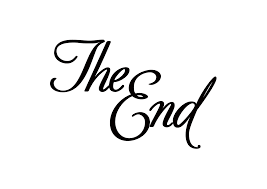